# Re-exploratory Analysis

We wish to study the data from a different angle, since the histogram doesn't give us a lot use full information. We first extract 12 Haralick features and other informations from each raw brain image data using matlab, features are computed over a certain region. See the information about [roi features extraction](https://github.com/Upward-Spiral-Science/claritycontrol/tree/master/code/clarity_roi).

> Note: The matlab program takes each image volume data and annotation data into memory. Though optimized, the program still supposed to be run on a machine or server with sufficent memory and computation resources.

## Setup
Setup environment and read data

In [1]:
FEATURES_PATH = '../code/data/roi_features/features.csv'  # use your own path

import numpy as np
import matplotlib
matplotlib.use('AGG')  # avoid some error in matplotlib, delete this line if the following doesn't work
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import jgraph as ig
%matplotlib inline

# DATA description (column description)
# 0. class label [0=cocaine | 1=control | 2=fear]
# 1. brain number
# 2. roi number
# 3. roi position X
# 4. roi position Y
# 5. roi position Z
# 6. roi mean
# 7. roi std
# 8. Haralick feature - Energy
# 9. Haralick feature - Entropy
# 10. Haralick feature - Correlation
# 11. Haralick feature - Contrast
# 12. Haralick feature - Variance
# 13. Haralick feature - SumMean
# 14. Haralick feature - Inertia
# 15. Haralick feature - Cluster Shade
# 16. Haralick feature - Cluster tendency
# 17. Haralick feature - Homogeneity
# 18. Haralick feature - MaxProbability
# 19. Haralick feature - Inverse Variance
fields = ['label','nbrain','nroi','roix','roiy','roiy','mean','std','energy','entropy','correlation','contrast','variance',
          'summean','inertia','cluster shade','cluster tendency','homogeneity','maxProbability','inverse variance']
data = np.genfromtxt(FEATURES_PATH, delimiter=",", dtype=np.float32)# the features data have been pre-processed and merged

brain_nums = np.unique(data[:,1])
roi_nums = np.unique(data[:,2])

# preview - print brain numbers
print brain_nums

# preview - print roi numbers
print roi_nums


/Users/david/.envs/clarityenv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


[ 173.  174.  175.  177.  178.  181.  182.  187.  188.  189.  197.  199.
  200.  239.  258.]
[  50.   55.   56.   67.   79.   87.  110.  131.  250.  258.  266.  303.
  311.  439.  447.  451.  455.  464.  471.  544.  551.  559.  587.  652.
  660.  749.  872.]


## Distribution of 12 features

Let's look into the data first.

Plot and compare the distribution of 12 features on same region.

/Users/david/.envs/clarityenv/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


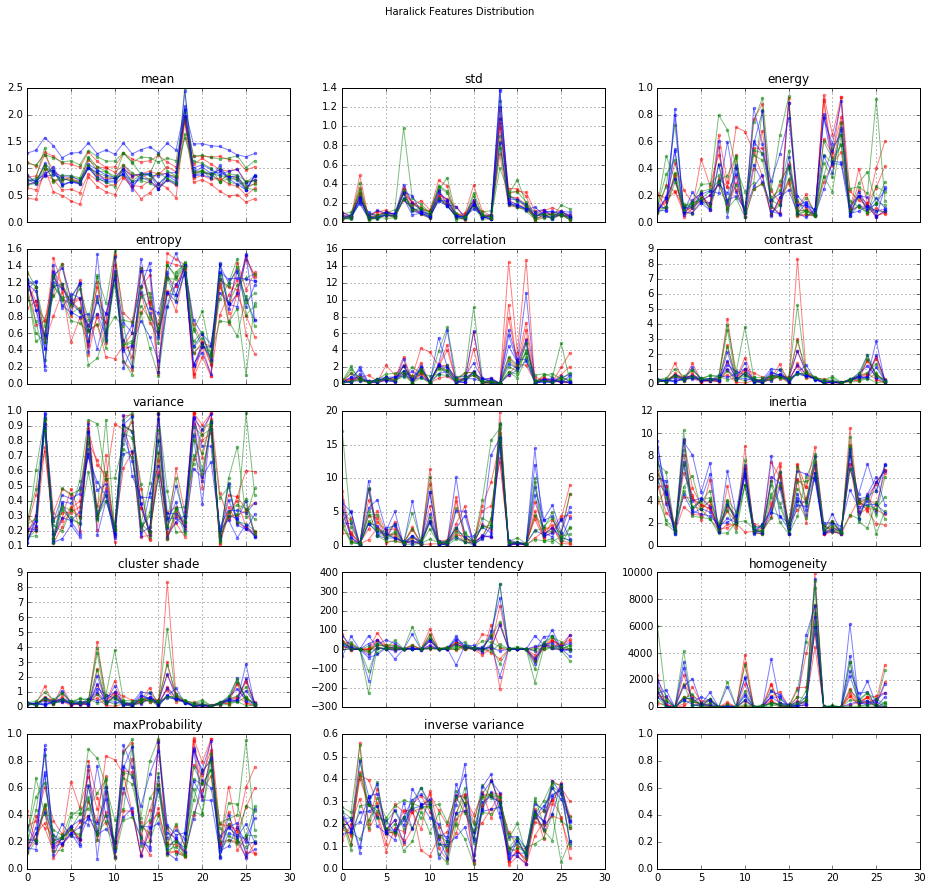

In [2]:
fig, ax = plt.subplots(5,3,sharex=True,sharey=False,figsize=(16,14))
axesList = []
for axes in ax:
    axesList.extend(axes)

for brain_n in brain_nums:
    tmp = data[data[:,1]==brain_n,:]
    tmp = tmp[np.argsort(tmp[:, 2]),:]
    
    if tmp[0,0] == 0:
        color = 'r'  # cocaine
    elif tmp[0,0] == 1:
        color = 'g'  # control
    elif tmp[0,0] == 2:
        color = 'b'  # fear
        
    for i, ax in enumerate(axesList[:-1]):
        ax.plot(range(len(tmp[:,2])),tmp[:,6+i],color,alpha=0.5,marker='.')
        ax.set_title(fields[6+i])
        ax.grid()
fig.suptitle('Haralick Features Distribution')
fig.show()

## ROI 3D position plot

TypeError: auto_scale_xyz() takes at least 3 arguments (1 given)

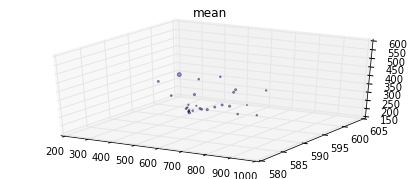

In [15]:
BRAIN_N = 173  # Which brain would you like to study?
tmp = data[data[:,1]==BRAIN_N,:]
fig = plt.figure(figsize=(16,24))

for i,field in enumerate(fields[6:]):
    ax = fig.add_subplot(7,2,i+1, projection='3d')
    ax.set_title(field)
    s = (tmp[:,6+i]-min(tmp[:,6+i]))/max(tmp[:,6+i])*19+1
    ax.scatter(tmp[:,3], tmp[:,4], tmp[:,5],s=s, c='b', marker='o', alpha=0.4)
    ax.auto_scale_xyz()
fig.show()